**Title**: 2022-11-20 ML Pima Indian Data 2

**To**:&nbsp;&nbsp;&nbsp;&nbsp; Magnimind

**From**: Matt Curcio, matt.curcio.ri@gmail.com

**Date**: 2022-11-20

**Re**:&nbsp;&nbsp;&nbsp; Pima Indian Data Diabetes Modeling With Grid Search


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pima-Indian-Data-Modeling-With-Grid-Search" data-toc-modified-id="Pima-Indian-Data-Modeling-With-Grid-Search-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pima Indian Data Modeling With Grid Search</a></span><ul class="toc-item"><li><span><a href="#Initial-Data-Analysis" data-toc-modified-id="Initial-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initial Data Analysis</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Draw-histograms-of-the-10-data-attributes" data-toc-modified-id="Draw-histograms-of-the-10-data-attributes-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Draw histograms of the 10 data attributes</a></span></li><li><span><a href="#Running-The-K-Nearest-Neighbor-Classifier" data-toc-modified-id="Running-The-K-Nearest-Neighbor-Classifier-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Running The K-Nearest Neighbor Classifier</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Graphical-Presentation-of-K-NN-vs-Score" data-toc-modified-id="Graphical-Presentation-of-K-NN-vs-Score-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Graphical Presentation of K-NN vs Score</a></span></li></ul></li></ul></div>

## Pima Indian Data Modeling With Grid Search

### Initial Data Analysis

The Pima Indians reside in central and southern Arizona, as well as northwestern Mexico in the states of Sonora and Chihuahua.

| <img src="https://unityinc.org/wp-content/uploads/2020/01/20200104_180119-1-1568x1176.jpg" alt='Salt River Pima-Maricopa Indian Community youth council members' width="400"/> |
|:--:|
| <b>Salt River Pima-Maricopa Indian Community youth council members</b> |

The Pima Indians Diabetes Onset dataset is a standard machine learning dataset available for free download from the UCI Machine Learning repository. It describes a portion of patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as 0).

- NTP: Number times pregnant.
- PGC: Plasma glucose concentration post 2 hours in an oral glucose tolerance test. 
- DBP: Diastolic blood pressure (mm Hg).
- TSFT: Triceps skin fold thickness (mm).
- 2hSI: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index.
- DPF: Diabetes pedigree function.
- Age: Age (years).
- OnDiab: Class, onset of diabetes within five years.

In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


zip_file = "archive.zip"

try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Zip file corrupt")


Extracted all


In [2]:
!ls  

'2022-11-20 ML Pima Indian Data 2.ipynb'   auto-mpg.csv
'2022-NOT DONE ML No.1.ipynb'		   pima-indians-diabetes.csv
 archive.zip


In [3]:
filename = 'pima-indians-diabetes.csv'

df = pd.read_csv(filename, header=None)
df.columns = ['NTP', 'PGC','DBP','TSFT','2hSI','BMI','DPF','Age','OnDiab']

df.info()

print('\nDataframe dimensions: ',
      df.shape[0], 'Observations &', df.shape[1], 'features.\n')
print('*'*20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NTP     768 non-null    int64  
 1   PGC     768 non-null    int64  
 2   DBP     768 non-null    int64  
 3   TSFT    768 non-null    int64  
 4   2hSI    768 non-null    int64  
 5   BMI     768 non-null    float64
 6   DPF     768 non-null    float64
 7   Age     768 non-null    int64  
 8   OnDiab  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Dataframe dimensions:  768 Observations & 9 features.

********************


**NOTE 1**: I find `.info()` to the most efficient method for extracting the basic characteristics. Therefore I will not use the individual commands for `.shape`, `.column` names, and data types.

In [4]:
df.head(10)

,NTP,PGC,DBP,TSFT,2hSI,BMI,DPF,Age,OnDiab
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Descriptive statistics

- Highly imbalanced data can cause problems. This common occurrence may need special handling in data preparation. You can quickly get an idea of the distribution of the `OnDiab` attribute in Pandas. 


- Grouped data by `OnDiab` attribute and used describe to count statistically describe the different variable attributes.

In [5]:
df.describe()

,NTP,PGC,DBP,TSFT,2hSI,BMI,DPF,Age,OnDiab
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print('Occurrence counts for feature "OnDiab":')

# count occurrences a particular column
occur = df.groupby(['OnDiab']).size()

# display occurrences of a particular column
display(occur)

Occurrence counts for feature "OnDiab":


OnDiab
0    500
1    268
dtype: int64

**NOTE 2**: The dataset ratio for `OnDiab` is **1.96 False:1 True**.

### Draw histograms of the 10 data attributes

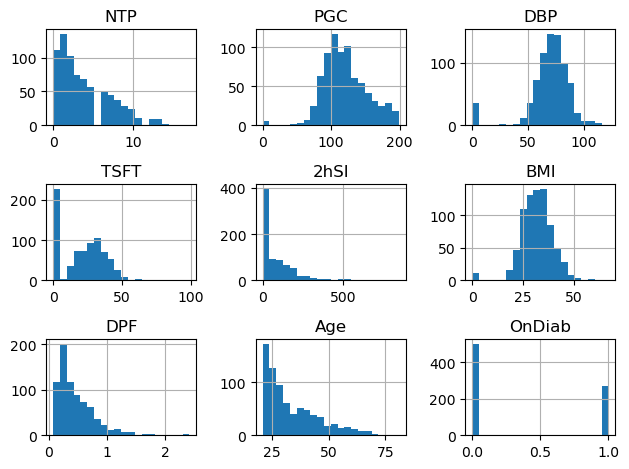

In [7]:
hist = df.hist(bins=20)
plt.tight_layout()

**NOTE 3**: Investigation of the dataset statistics and the histograms there are more than a few zero values. In future modeling sessions imputation should be investigated to (PGC, DBP, TSFT, 2hSI, BMI, DPF and Age). Some or all of the features may benefit by using Imputation.

### Running The K-Nearest Neighbor Classifier

- Separate dataset into feature set (X) Vs. target variable Y=`OnDiab`
- Split your dataset into train and test datasets, 
   - Set test size as 0.25
   - Set the random seed top = 7
   - Set a stratified split = y
- Train KNearestNeighbor classifer on your train dataset
    - Set number of neighbors to 5
    - Print the score on the the test dataset. 


In [8]:
# 1. Scaling of Parameters
# 2. Separate X from Y

x = scale(df.drop(['OnDiab'], axis=1))

y = df.OnDiab

x.shape, y.shape

((768, 8), (768,))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

print('\nPima Indian diabetes dataset scaled, split = 25%, knn = 5:')

print('\nTrain KNN score =', knn.score(x_train, y_train))
print('\nTest KNN score =',knn.score(x_test, y_test))


Pima Indian diabetes dataset scaled, split = 25%, knn = 5:

Train KNN score = 0.828125

Test KNN score = 0.75


### Grid Search

- Neighbors = 1 to 30, compute `GridSearchCV` for train dataset with kfold=10.
- Print the best cross validation score
- Print the best parameter
- Print the test score

In [11]:
# Grid Search
param_grid = {'n_neighbors': np.arange(1, 30, 2)}

grid = GridSearchCV(KNeighborsClassifier(), \
                    param_grid=param_grid, \
                    cv=10, \
                    return_train_score=True)

# Split and scaled data were reused from step 4

grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [12]:
print('\nUsing KN=[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]')
print('\nBest Grid Scored =', grid.best_score_)
print('\nBest Grid Parameter =', grid.best_params_)


Using KN=[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

Best Grid Scored = 0.7569570477918935

Best Grid Parameter = {'n_neighbors': 27}


In [13]:
#grid.cv_results_

results = pd.DataFrame(grid.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001232,0.000679,0.002608,0.001232,1,{'n_neighbors': 1},0.724138,0.637931,0.637931,0.741379,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000990,0.000347,0.002138,0.001186,3,{'n_neighbors': 3},0.758621,0.672414,0.672414,0.758621,...,0.843629,0.843629,0.849421,0.853282,0.838150,0.845857,0.861272,0.853565,0.847606,0.006488
2,0.000758,0.000078,0.001706,0.000071,5,{'n_neighbors': 5},0.775862,0.689655,0.689655,0.758621,...,0.826255,0.826255,0.820463,0.814672,0.818882,0.830443,0.826590,0.822736,0.825232,0.006956
3,0.000716,0.000036,0.001705,0.000072,7,{'n_neighbors': 7},0.775862,0.724138,0.689655,0.775862,...,0.810811,0.801158,0.816602,0.805019,0.799615,0.813102,0.797688,0.801541,0.805364,0.006247
4,0.000717,0.000057,0.001748,0.000063,9,{'n_neighbors': 9},0.741379,0.724138,0.724138,0.741379,...,0.797297,0.791506,0.787645,0.789575,0.788054,0.799615,0.791908,0.784200,0.790509,0.005679


### Graphical Presentation of K-NN vs Score

<AxesSubplot:title={'center':'N-Nearest Neighbors Vs Score'}, xlabel='param_n_neighbors'>

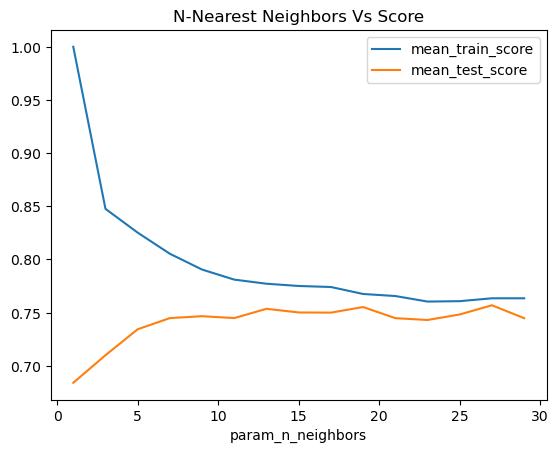

In [15]:
results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca(), title='N-Nearest Neighbors Vs Score')